In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
# Preprocess the data
# Reshape and normalize the images
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [4]:
# Pad the images to 32x32 as the model expects larger input
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT")
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2], [0, 0]], "CONSTANT")

In [5]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
# Define the model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=[32, 32, 1]),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(10, activation="softmax")
])

/Users/amitsingh/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 166s 110ms/step - accuracy: 0.6920 - loss: 0.8928 - val_accuracy: 0.9834 - val_loss: 0.0718
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 181s 121ms/step - accuracy: 0.9614 - loss: 0.1496 - val_accuracy: 0.9847 - val_loss: 0.0709
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 187s 124ms/step - accuracy: 0.9753 - loss: 0.1054 - val_accuracy: 0.9835 - val_loss: 0.0684
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 189s 126ms/step - accuracy: 0.9812 - loss: 0.0796 - val_accuracy: 0.9848 - val_loss: 0.0605
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 191s 127ms/step - accuracy: 0.9852 - loss: 0.0660 - val_accuracy: 0.9883 - val_loss: 0.0523
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 190s 127ms/step - accuracy: 0.9858 - loss: 0.0585 - val_accuracy: 0.9898 - val_loss: 0.0423
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 190s 127ms/step - accuracy: 0.9863 - loss: 0.0544 - val_accuracy: 0.9883 - val_loss: 0.0603
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 188s 125ms/step - ac

In [8]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9874 - loss: 0.0844
Test accuracy: 99.00%


In [9]:
# Make predictions on the test set
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step


In [10]:
# Get predicted labels
predicted_labels = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


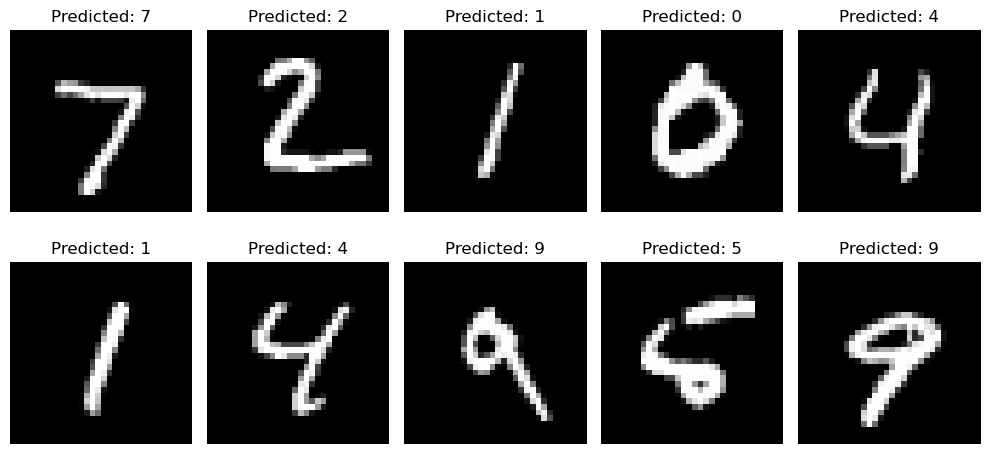

In [13]:
# Make predictions on the test set
predictions = model.predict(x_test)
predicted_labels = predictions.argmax(axis=1)

# Display some predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].numpy().reshape(32, 32), cmap='gray')  # Convert to NumPy and reshape
    plt.title(f'Predicted: {predicted_labels[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()
